<a href="https://colab.research.google.com/github/lindseyhuppin/Neur265Work/blob/main/finalProject/FinalPosterPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is written for the Methods and Results portion of the Final Poster Presentation in Intro to Neural Data Analysis.

Lindsey Huppin

4/21/24

####Notes on data:

column information:

0 = index value

1 = patient ID

2 = cognitive status

3 = fresh brain weight

4 = number of pTDP43 positive cells per area_Grey matter

5 = total Iba1 positive area_Grey matter

6 = number of 6e10 positive objects per area_Grey matter

7 = total GFAP positive area_Grey matter

In [ ]:
#adding libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Importing the data as .csv files, organized from the original data source
data = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/finalProject/AlzheimerData.csv',delimiter = ',',dtype = 'str')
data[0][0] = '0' #this adjusts for an error that occurs when importing the data
data[3]

array(['3', 'H20.33.004', 'Dementia', '1261', '0', '4284872', '4.07E-05',
       '6546220.125'], dtype='<U11')

In [ ]:
#Sorting the data
index = data[:,0].astype(int)
patientID = data[:,1]
cognitiveStatus = data[:,2]
brainWeight_temp = data[:,3]
pTDP43 = data[:,4].astype(float)
Iba1 = data[:,5].astype(float)
_6e10 = data[:,6].astype(float)
GFAP = data[:,7].astype(float)

brainWeight_str = np.delete(brainWeight_temp,30) #removes the unavailable data
brainWeight = brainWeight_str.astype(int)

In [34]:
pTDP43_noD = []
_6e10_noD = []
pTDP43_yD = []
_6e10_yD = []

Iba1_less = []
GFAP_less = []
Iba1_more = []
GFAP_more = []

for i in range(index.size):
  if cognitiveStatus[i] == 'No dementia':
    pTDP43_noD.append(pTDP43[i])
    _6e10_noD.append(_6e10[i])
  elif cognitiveStatus[i] == 'Dementia':
    pTDP43_yD.append(pTDP43[i])
    _6e10_yD.append(_6e10[i])
  else:
    print('Throwing error: sorting incorrect')

  if i == index.size-1:
    continue
  else:
    if brainWeight[i] <= 1162:
      Iba1_less.append(Iba1[i])
      GFAP_less.append(GFAP[i])
    elif brainWeight[i] > 1162:
      Iba1_more.append(Iba1[i])
      GFAP_more.append(GFAP[i])
    else:
      print('Throwing error: sorting incorrect')

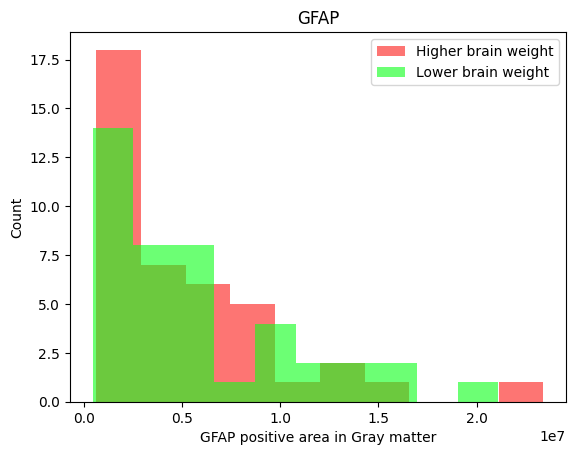

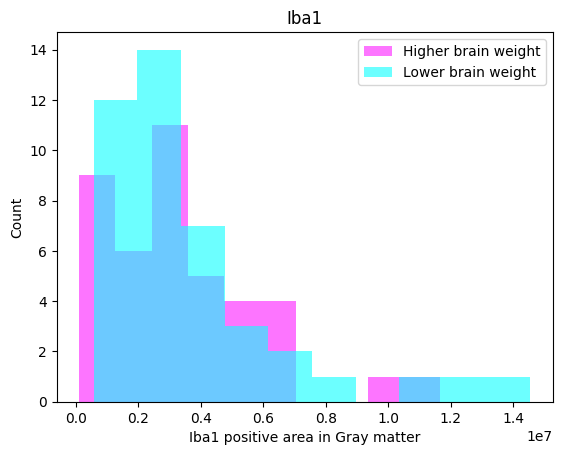

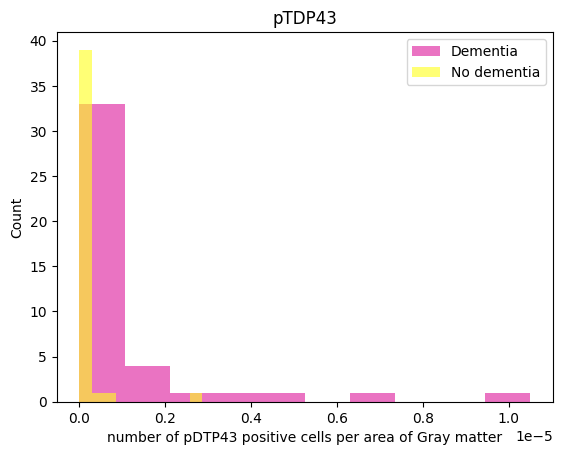

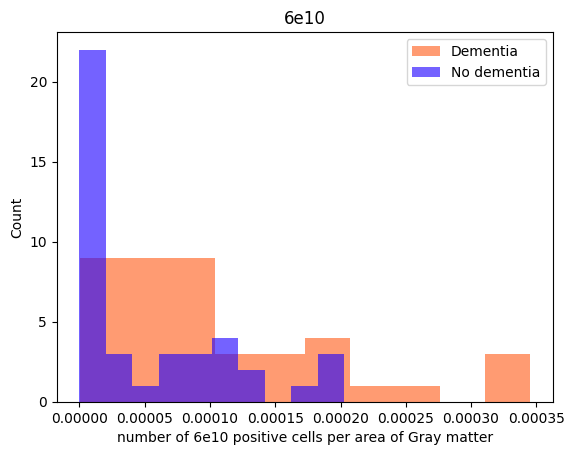

In [49]:
##change the histograms to comparing dependents
#GFAP histogram
plt.hist(GFAP, color = '#fd1f1c9d')
plt.hist(Iba1,color = '#11ff1d9d')
plt.xlabel('GFAP positive area in Gray matter')
plt.ylabel('Count')
plt.title('GFAP')
plt.legend(['Higher brain weight','Lower brain weight'])
plt.show()

#Iba1 histogram
plt.hist(Iba1_more, color = '#fd1fff9d')
plt.hist(Iba1_less,color = '#11ffff9d')
plt.xlabel('Iba1 positive area in Gray matter')
plt.ylabel('Count')
plt.title('Iba1')
plt.legend(['Higher brain weight','Lower brain weight'])
plt.show()

#pTDP43 histogram
plt.hist(pTDP43_yD, color = '#dd1c9d9d')
plt.hist(pTDP43_noD,color = '#ffff1f9d')
plt.xlabel('number of pDTP43 positive cells per area of Gray matter')
plt.ylabel('Count')
plt.title('pTDP43')
plt.legend(['Dementia','No dementia'])
plt.show()

#6e10 histogram
plt.hist(_6e10_yD, color = '#ff5d1a9d')
plt.hist(_6e10_noD,color = '#1e01ff9d')
plt.xlabel('number of 6e10 positive cells per area of Gray matter')
plt.ylabel('Count')
plt.title('6e10')
plt.legend(['Dementia','No dementia'])
plt.show()

In [ ]:
#bar/pie graphs

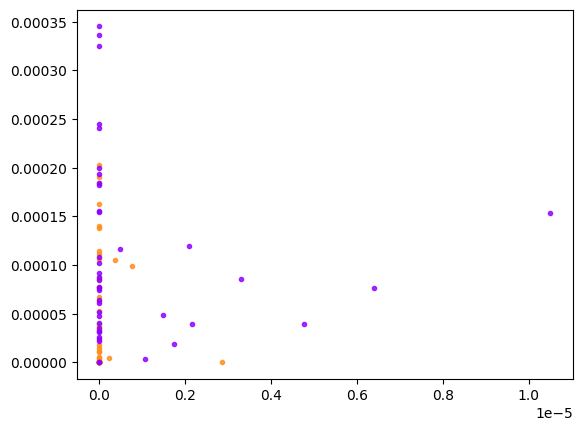

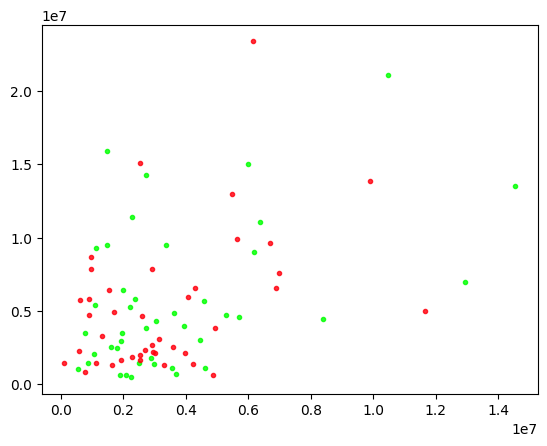

In [ ]:
#scatter plots
plt.plot(pTDP43_noD,_6e10_noD,'.', color = '#ff8d1acf')
plt.plot(pTDP43_yD,_6e10_yD,'.', color = '#8f00ffcf')
plt.show()
plt.plot(Iba1_less,GFAP_less,'.', color = '#00ff00cf')
plt.plot(Iba1_more,GFAP_more,'.', color = '#ff000dcf')

plt.show()